In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/content/water_potability.csv")

In [3]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
from sklearn.impute import SimpleImputer

In [6]:
SI = SimpleImputer(missing_values=np.nan,strategy="mean")
df[["pd","Sulfate"]] = SI.fit_transform(df[["ph","Sulfate"]])

In [7]:
df.dropna(inplace = True)
df.drop("pd",axis = 1,inplace = True)
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000,2649.000000
mean,7.080149,196.334521,21923.811170,7.127005,333.357403,427.588395,14.302738,66.491551,3.969699,0.397131
std,1.584537,32.892158,8692.441264,1.586310,35.900470,81.103742,3.314805,16.162351,0.780571,0.489396
min,0.000000,73.492234,320.942611,0.530351,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.091383,176.808661,15671.119287,6.137757,316.567319,367.897563,12.095251,55.968217,3.445756,0.000000
50%,7.038092,197.191839,20852.764496,7.121264,333.775777,424.003499,14.252684,66.608891,3.958609,0.000000
75%,8.054886,216.673869,27215.902742,8.108318,349.492177,483.745716,16.575981,77.457885,4.511384,1.000000
max,14.000000,323.124000,56867.859236,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


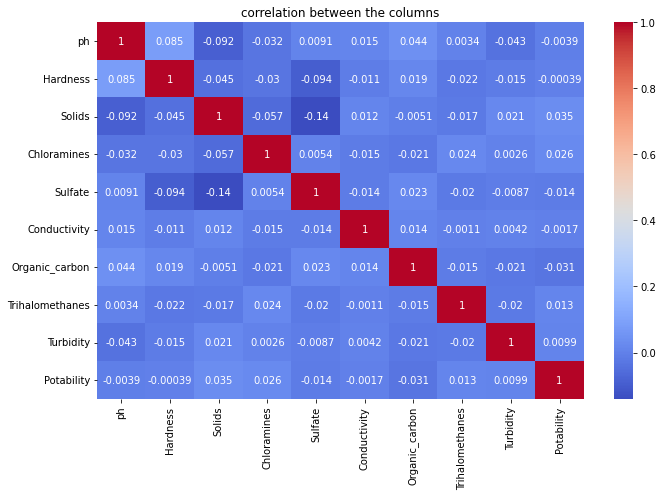

In [9]:
plt.figure(figsize= (10,7))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)
plt.title('correlation between the columns')
plt.tight_layout()
plt.show()

In [10]:
df["Potability"].value_counts()

0    1597
1    1052
Name: Potability, dtype: int64

In [11]:
x = df.drop(["Potability"],axis = 1)
y = df["Potability"]

In [12]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
x = mm.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,random_state=1,test_size=0.25)

In [15]:
ytrain.value_counts()

0    1199
1     787
Name: Potability, dtype: int64

In [16]:
ytest.value_counts()

0    398
1    265
Name: Potability, dtype: int64

In [17]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import Dropout

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.6736 - val_loss: 0.6742
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6715 - val_loss: 0.6743
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6712 - val_loss: 0.6743
Epoch 4/100
63/63 [==============================] - 0s 8ms/step - loss: 0.6706 - val_loss: 0.6737
Epoch 5/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6711 - val_loss: 0.6742
Epoch 6/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6698 - val_loss: 0.6736
Epoch 7/100
63/63 [==============================] - 0s 8ms/step - loss: 0.6702 - val_loss: 0.6735
Epoch 8/100
63/63 [==============================] - 0s 5ms/step - loss: 0.6693 - val_loss: 0.6728
Epoch 9/100
63/63 [==============================] - 0s 7ms/step - loss: 0.6687 - val_loss: 0.6725
Epoch 10/100
63/63 [==============================] - 0s 6ms/step - loss: 0.6684 - val_loss: 0.6733
Epoch 11/

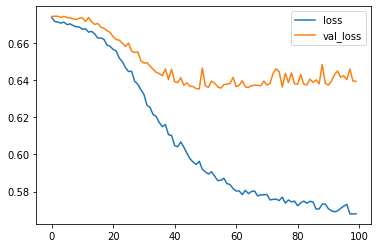

In [18]:
ann = Sequential()

ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dense(units = 15, activation = "relu"))
ann.add(Dense(units = 1, activation = "sigmoid"))

ann.compile(optimizer = "adam", loss = "binary_crossentropy")

ann.fit(xtrain,ytrain,epochs = 100,validation_data = (xtest,ytest)) 

lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [19]:
ann = Sequential()

ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dropout(0.5))
ann.add(Dense(units = 15, activation = "relu"))
ann.add(Dropout(0.5))
ann.add(Dense(units = 1, activation = "sigmoid"))

ann.compile(optimizer = "adam", loss = "binary_crossentropy")

ann.fit(xtrain,ytrain,epochs = 100,validation_data = (xtest,ytest)) 

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.7350 - val_loss: 0.6924
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6917 - val_loss: 0.6830
Epoch 3/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6804 - val_loss: 0.6764
Epoch 4/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6770 - val_loss: 0.6732
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6745 - val_loss: 0.6726
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6769 - val_loss: 0.6729
Epoch 7/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6767 - val_loss: 0.6734
Epoch 8/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6736 - val_loss: 0.6730
Epoch 9/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6753 - val_loss: 0.6731
Epoch 10/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6709 - val_loss: 0.6725
Epoch 11/

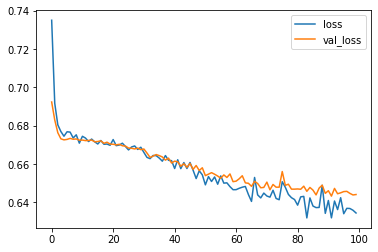

In [20]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()

In [21]:
ann = Sequential()

ann.add(Dense(units = 30, activation = "relu"))
ann.add(Dense(units = 15, activation = "relu"))
ann.add(Dense(units = 1, activation = "sigmoid"))

ann.compile(optimizer = "adam", loss = "binary_crossentropy")

In [22]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(min_delta = 0.01,patience = 5,monitor = "val_loss",verbose = 1)
ann.fit(xtrain,ytrain,epochs = 100,validation_data = (xtest,ytest),callbacks = [earlystopping])

Epoch 1/100
63/63 [==============================] - 1s 6ms/step - loss: 0.6764 - val_loss: 0.6723
Epoch 2/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6720 - val_loss: 0.6722
Epoch 3/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6711 - val_loss: 0.6730
Epoch 4/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6719 - val_loss: 0.6719
Epoch 5/100
63/63 [==============================] - 0s 4ms/step - loss: 0.6710 - val_loss: 0.6721
Epoch 6/100
63/63 [==============================] - 0s 3ms/step - loss: 0.6706 - val_loss: 0.6720
Epoch 6: early stopping


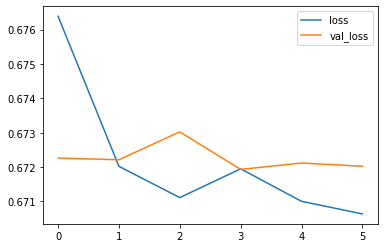

In [23]:
lossdf = pd.DataFrame(ann.history.history)
lossdf.plot()